# Cross-Conformal Prediction

## Overview
This notebook presents the results from cross-conformal prediction method using Ridge Regression model.

When transitioning from conformal prediction to cross-conformal prediction, the key change is in how the nonconformity scores are computed. Instead of calculating them based on a single set of training data, cross-conformal prediction divides the data into multiple folds, akin to k-fold cross-validation.

For each fold, the model is trained on the other folds and nonconformity scores are calculated for the excluded fold. This process is repeated for each fold. The final nonconformity score for each point is then an aggregation of the scores obtained when that point was in the excluded fold. This can provide more robust and reliable intervals as it reduces the dependency on a particular train-test split and incorporates a form of data augmentation.

In [2]:
from ridge_regression import RidgeRegression
import data_utils
import numpy as np

%load_ext autoreload
%autoreload 2

In [8]:
train_data, test_data = data_utils.load_extended_boston(17)

In [9]:
data = np.concatenate((train_data, test_data), axis=0)

In [11]:
model = RidgeRegression(10)
model.cross_conformal_prediction(5, data, 0.95)

[[[0.4444444444444444,
   0.725925925925926,
   0.7851851851851852,
   0.7679012345679013,
   0.254320987654321,
   0.5037037037037037,
   0.7037037037037037,
   0.4617283950617284,
   0.8987654320987655,
   0.09876543209876543,
   0.024691358024691357,
   0.1728395061728395,
   0.7407407407407407,
   0.9407407407407408,
   0.6320987654320988,
   0.7111111111111111,
   0.9629629629629629,
   0.7358024691358025,
   0.0049382716049382715,
   0.9901234567901235,
   0.17530864197530865,
   0.11358024691358025,
   0.725925925925926,
   0.9728395061728395,
   0.05925925925925926,
   0.9061728395061729,
   0.2345679012345679,
   0.2938271604938272,
   0.9629629629629629,
   0.06666666666666667,
   0.9061728395061729,
   0.45185185185185184,
   0.22469135802469137,
   0.7283950617283951,
   0.8641975308641975,
   0.5259259259259259,
   0.9407407407407408,
   0.8790123456790123,
   0.9950617283950617,
   0.5209876543209877,
   0.5061728395061729,
   0.7555555555555555,
   0.26666666666666666,
 

Mean p-values for each data point.

In [16]:
model.cross_conformal_prediction(5, data, 0.95)

array([[0.43407407, 0.47061728, 0.6237037 , 0.53432099, 0.38271605,
        0.66271605, 0.62222222, 0.54617284, 0.57679012, 0.39407407,
        0.63901235, 0.46962963, 0.78222222, 0.61481481, 0.61925926,
        0.5891358 , 0.74666667, 0.85135802, 0.44395062, 0.40987654,
        0.30666667, 0.32197531, 0.6617284 , 0.77037037, 0.41283951,
        0.60197531, 0.51012346, 0.43160494, 0.63259259, 0.34024691,
        0.67654321, 0.3437037 , 0.55802469, 0.83604938, 0.75160494,
        0.60493827, 0.6854321 , 0.55753086, 0.86765432, 0.55160494,
        0.61530864, 0.67259259, 0.32      , 0.56493827, 0.56444444,
        0.50074074, 0.36345679, 0.72098765, 0.15851852, 0.56493827,
        0.30864198, 0.4617284 , 0.40592593, 0.30962963, 0.75160494,
        0.36790123, 0.60444444, 0.60197531, 0.55703704, 0.74419753,
        0.66123457, 0.66716049, 0.46765432, 0.39407407, 0.54617284,
        0.41037037, 0.54123457, 0.24641975, 0.68395062, 0.63555556,
        0.62567901, 0.50419753, 0.4345679 , 0.43

The intervals for the prices given the significance level.

In [21]:
model.cross_conformal_prediction(5, data, 0.95)

[(37.06920023607262, 37.93734838422077),
 (14.586773969264286, 15.528008537165519),
 (11.595367206896137, 12.842774614303545),
 (16.64670153539707, 17.715343510705715),
 (23.89389703670727, 24.6593291354727),
 (24.452023951392267, 25.7774560501577),
 (17.379380900353635, 18.62382534479808),
 (23.287159012900492, 24.37950469191284),
 (21.095127661591622, 22.2487079085052),
 (21.09333744317585, 21.881485591323997),
 (19.40489834476935, 20.682923036127377),
 (31.966545337481236, 32.905804596740495),
 (11.288391581195178, 12.852836025639622),
 (18.53872102417312, 19.76835065380275),
 (40.47165146484113, 41.71016998335965),
 (6.10449472546153, 7.282766330399802),
 (22.96676915122889, 24.46010248456222),
 (24.583145301871284, 26.285861351254),
 (21.60696146606466, 22.49486270063256),
 (18.93178479630111, 19.75153788272086),
 (12.249064426906148, 12.862397760239482),
 (34.134116502451185, 34.778067119735134),
 (25.3704696767358, 26.69392646685926),
 (18.981295860000493, 20.52203660074123),
 (

In [23]:
from lasso_regression import LassoRegression
import model_selection

lambdas = [0.001, 0.01, 0.1, 1, 10]

model = LassoRegression(0.001, 0.001, 0.001, 150000)

model = model_selection.lambda_lasso(data, 5, lambdas, model)
model

0.13117588122328308
0.15535295059654222
0.2146217191170296
0.6518805472444119
0.9592025303746752
Best lambda: 0.001, with score: 0.13117588122328308


In [24]:
model.train(train_data)

In [25]:
model.r_score()

0.8699483798223459

In [26]:
model.test(test_data)

In [27]:
model.r_score()

0.8549245535783949

In [29]:
model.predict()

array([38.28821862, 14.74943106, 12.03260124, 17.42765319, 24.3709564 ,
       25.78417656, 17.11081427, 23.86512206, 19.74520291, 23.90055626,
       23.04710607, 28.70120774, 10.41673694, 20.25885538, 41.01006684,
        6.26359299, 21.45760953, 26.13974641, 22.19965464, 19.70196801,
       12.65048646, 34.92969017, 25.55742135, 19.37387039, 14.35338167,
       25.74774409, 22.21886457, 27.74951922, 24.68251831, 18.1129731 ,
       12.67033681, 18.215865  , 24.18893187, 36.91815694, 24.2706873 ,
       24.14271924, 21.32921595, 21.82717336, 19.85716201,  7.35677376,
       24.41342004, 26.24366615, 28.5068294 , 32.50428639, 21.75616893,
       29.78998269, 17.01847829, 27.52298947, 33.15686333,  8.31854998,
       22.9991014 , 25.16131278, 27.67983703, 27.59260075, 20.29667389,
       12.03879604, 32.66826376, 21.12159302, 25.74618028, 27.69549641,
       22.55963904, 18.21363289, 15.38090125, 23.93133612,  8.94247262,
       18.26198294, 13.67367931, 17.76188644, 29.24495182, 19.80

In [30]:
model.cross_conformal_prediction(5, data, 0.99)

[(37.80624330938885, 38.7701939266728),
 (14.185974267900209, 15.312887848147122),
 (11.239514821532643, 12.825687661038815),
 (16.891356891240935, 17.963949483833527),
 (23.943302074176835, 24.79861071615214),
 (25.185164211549083, 26.383188902907104),
 (16.475258714290206, 17.746369825401317),
 (23.32191218513766, 24.408331938224077),
 (19.00248685606481, 20.48791895483024),
 (23.618087124031042, 24.18302539563598),
 (22.36315545672262, 23.731056691290522),
 (28.257257120025784, 29.145158354593683),
 (9.657230771690505, 11.176243117369518),
 (19.771447969632344, 20.746262784447158),
 (40.51377054423638, 41.506363136828966),
 (5.549518918053627, 6.977667066201775),
 (20.654152739011465, 22.261066319258376),
 (25.242462456254504, 27.03703035748907),
 (21.62928426680796, 22.7700250075487),
 (19.156782826329117, 20.24715319669949),
 (12.242091397221404, 13.058881520678195),
 (34.544011153772615, 35.31536917846397),
 (24.7356929537119, 26.37914974383536),
 (18.53041360068299, 20.217327180

Cross-Conformal-Prediction works as planned with lasso too.

In [56]:
model = RidgeRegression(10)
model.cross_conformal_prediction(5, data, 0.95)

[(17.772422020555492, 19.283533131666605),
 (28.56409475455411, 29.34434166813436),
 (20.287402051057743, 20.914562544884905),
 (19.745173719730776, 20.545173719730773),
 (12.870190296245655, 14.509696469085162),
 (20.60553523179946, 21.38578214537971),
 (18.415906299768352, 19.10232605285477),
 (20.717010166692504, 21.625652142001144),
 (39.33178125918963, 39.51943558017728),
 (13.629032066813147, 15.520121175724038),
 (17.130018656934134, 18.705327298909445),
 (22.924281396988846, 24.702059174766624),
 (15.58954525038595, 15.974730435571136),
 (17.46258189768031, 17.64575021451199),
 (17.42188124626998, 18.43673273141849),
 (15.738828910771499, 16.301791873734462),
 (None, None),
 (22.719969631126663, 23.243426421250117),
 (19.22698224485248, 20.65414273867964),
 (None, None),
 (15.258924712745202, 16.560904910765004),
 (40.69994725547623, 42.082663304858954),
 (16.30796211827164, 17.226480636790157),
 (None, None),
 (4.08725304968221, 5.904537000299494),
 (None, None),
 (30.00361749

In [42]:
len(data[:, -1])

506

In [38]:
data.shape

(506, 105)

In [45]:
data[:, -1]

array([24.8, 16.8, 13.1, 25.1, 32. , 20.6, 23.8, 18.8, 48.5, 18.4, 12.7,
       20.3, 22.3, 33. , 22.2, 18.4, 13.8, 18.7, 18.8, 11.9, 21.2, 34.9,
       33.4, 17.8, 22.5, 15. , 20. , 21.5, 36.2, 14.1, 29.8, 19.3, 22.2,
       20. , 17.2, 19.8, 24.8, 10.4, 50. , 22.6, 25. , 23.7, 18.9, 15.2,
       26.5, 18.3, 24. , 22.4, 19.5, 27.5, 50. , 16.3, 18.2, 23.8, 17.8,
       23.8, 23.1, 19.3, 16.7, 12.1, 13.6, 22.5, 22.6, 21.7, 13.1,  9.6,
       27.5, 23.3, 11.7, 16. , 18.1, 19.8, 21.4, 44. , 22.9, 27.1, 13.3,
       12.7, 17.9, 16.1, 21.7, 18.5, 19.1, 22.9, 21.9, 21.9, 31. , 23.1,
       23.5, 31.2, 10.9, 32.9, 10.5,  7. , 21.8, 21. , 23.2, 15.4,  7. ,
       50. , 19.9, 23.4, 13.1, 20.4, 19.4, 22.2, 27.5, 13.1, 50. , 12.8,
       24.4, 30.3, 28.5, 24.7, 34.9, 30.1, 25. , 18.6, 16.5, 23.9, 20.7,
       21.2, 21.2, 15.6, 24.3,  7.5, 17.1, 20. , 14.9, 17.5,  5. , 19.4,
       14.5, 16.6, 23.6, 24.4, 50. , 33.3, 14.6, 24. , 18. , 23. , 19.1,
       28.6,  5. , 17.8,  8.5, 17.8, 14.5, 12. , 14

In [58]:
model = model_selection.lambda_ridge(data, 5, lambdas)

0.1448287535029033
0.1422604501183424
0.13491694307993968
0.12835736406949178
0.1382051275787281
Best lambda: 1, with score: 0.12835736406949178


In [61]:
model.cross_conformal_prediction(5, data, 0.95)

[(17.283531350005735, 18.923037522845238),
 (28.885222167667735, 29.62102463680354),
 (20.98983625688547, 21.379959713675593),
 (20.374319909231087, 20.91259151416936),
 (12.839330352168739, 14.681305660810713),
 (20.940042749322206, 21.37461065055677),
 (18.785744212954175, 19.136361496904794),
 (20.162500561593216, 21.732870931963586),
 (41.814275572030816, 42.569831127586376),
 (13.501849353183628, 15.22462163041135),
 (16.817457873979574, 18.703877627065996),
 (22.839720613477823, 24.439720613477824),
 (15.678348311586236, 16.004274237512163),
 (16.919179081462637, 17.10234739829432),
 (16.634300139757663, 17.881824892232913),
 (16.12946344568126, 16.62329060617509),
 (None, None),
 (22.082611947061192, 22.59619219397477),
 (20.228993527581054, 20.87590710782797),
 (None, None),
 (15.662741632337926, 17.18749410758545),
 (43.77705655310081, 44.98199482470576),
 (15.006630817731095, 15.915272793039735),
 (None, None),
 (0.5157078089687953, 2.204596697857684),
 (None, None),
 (29.092

In [157]:
model = LassoRegression(0.001, 0.001, 0.001, 150000)
model.cross_conformal_prediction(5, data, test_data, 0.95)

[(22.24016143955675, 35.271002142577686),
 (19.530914874224685, 32.56175557724562),
 (11.62913747326801, 24.659978176288945),
 (39.35340005591229, 52.38424075893322),
 (19.366966709312237, 32.39780741233317),
 (11.170278282194548, 24.201118985215484),
 (34.57942221220974, 47.61026291523067),
 (15.963995956466157, 28.994836659487092),
 (4.379660261018787, 17.41050096403972),
 (23.64598912428003, 36.67682982730096),
 (9.687814880086211, 22.718655583107147),
 (12.205414721195353, 25.23625542421629),
 (17.816463471162663, 30.8473041741836),
 (6.125462764815656, 19.15630346783659),
 (13.553820420202946, 26.58466112322388),
 (15.326969352339301, 28.357810055360236),
 (16.793599827264995, 29.82444053028593),
 (5.670545283846516, 18.70138598686745),
 (7.129131491727475, 20.15997219474841),
 (12.203484959861992, 25.234325662882927),
 (24.635027530562805, 37.66586823358374),
 (20.90143206733965, 33.93227277036058),
 (9.256436642797212, 22.287277345818147),
 (11.118080631424686, 24.14892133444562

In [158]:
prediction_intervals = model.cross_conformal_prediction(5, data, test_data, 0.95)

In [159]:
model.calculate_error_rate(test_data, prediction_intervals)

0.023622047244094488

In [6]:
rrmodel = RidgeRegression()

In [150]:
rrmodel.cross_conformal_prediction(5, data, test_data, 0.95)

[(22.434813900060526, 35.16113096942934),
 (19.81831906530678, 32.54463613467559),
 (12.099096646984336, 24.825413716353147),
 (39.02834835092382, 51.75466542029264),
 (19.525957349279246, 32.25227441864806),
 (11.385818835064345, 24.112135904433156),
 (34.33354658847115, 47.05986365783997),
 (15.96431502492754, 28.69063209429635),
 (3.863207773591852, 16.589524842960664),
 (23.31618766900002, 36.042504738368834),
 (10.709056759502829, 23.43537382887164),
 (12.712065792212478, 25.43838286158129),
 (17.555010710016216, 30.281327779385027),
 (6.515045905447956, 19.24136297481677),
 (14.012406400590862, 26.738723469959673),
 (15.229693249810147, 27.956010319178958),
 (16.996164323233273, 29.722481392602084),
 (6.3193014349625, 19.045618504331312),
 (8.097624648236689, 20.8239417176055),
 (12.31737700403415, 25.04369407340296),
 (24.616899226252034, 37.34321629562085),
 (20.955891453755207, 33.68220852312402),
 (9.408701086049337, 22.135018155418148),
 (11.540124676133146, 24.2664417455019

In [87]:
test_data[:, -1]

array([30.5, 22. , 17.7, 50. , 23.3, 19.9, 37.6, 23.3,  8.8, 32.5, 20. ,
       20.5, 22.7, 13.4, 20.9, 20.3, 23.4, 10.9, 18.9, 18.2, 28.2, 23.6,
       17.4, 16.7, 24.6, 39.8, 14.9,  9.7, 17.8, 23.9, 28.1, 17.1, 22.2,
       21.7, 24.1, 14.4, 30.1,  8.3, 20.4, 38.7,  8.7, 20.1, 36.2, 22.9,
       19.2, 13.5, 33.2, 22. , 21. , 12.6, 23.9, 16.1, 28.4, 25. , 18.5,
       15.6, 22.5, 23.2, 43.1, 23.9, 23. , 23.2, 18.9, 23. , 13.4, 24.2,
       24.4, 29.8, 31.6, 20.6, 37. , 19.6, 24.5, 36. , 11.8, 24.1, 25.3,
       30.1, 50. , 23.1, 13.4, 37.9, 19.7, 23.7, 25. , 20.6, 20.4, 13.8,
       20.7,  7.4, 21.7, 13. , 17.5, 27.9, 21.9, 19.6, 18.6, 18.9, 13.6,
       20.5, 17.4, 22.3,  8.8, 50. , 36.1, 14.6, 41.7, 32.2, 19.4, 20.8,
       24.8, 20.6, 15.4, 13.9, 18.7, 28. , 20.5, 23.9, 13.8, 17. , 11.8,
       32.4, 23.1, 43.5, 19.5, 45.4, 21.4])

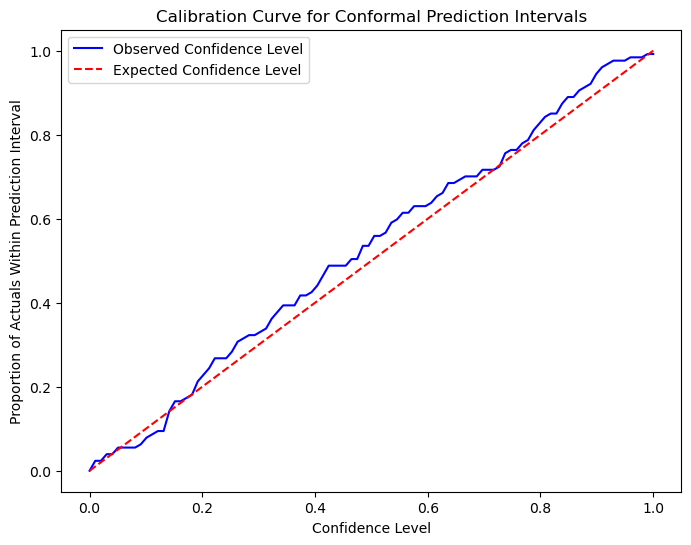

In [10]:
significance_levels = np.linspace(0, 1, 100)
rrmodel.cross_conformal_calibration_curve(data, test_data, significance_levels)

In [165]:
prediction_intervals = rrmodel.cross_conformal_prediction(5, data, test_data, 0.95)
rrmodel.calculate_error_rate(test_data, prediction_intervals)

0.023622047244094488

In [18]:
prediction_intervals = rrmodel.cross_conformal_prediction(5, data, test_data, 0.90)
rrmodel.calculate_error_rate(test_data, prediction_intervals)

0.05511811023622047

In [19]:
prediction_intervals = rrmodel.cross_conformal_prediction(5, data, test_data, 0.99)
rrmodel.calculate_error_rate(test_data, prediction_intervals)

0.007874015748031496

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

new_train_data , calibration_data = train_test_split(train_data, test_size=0.25, random_state=17)

In [9]:
prediction_intervals_cp = rrmodel.conformal_prediction(new_train_data, calibration_data, test_data, 0.90)
prediction_intervals_ccp = rrmodel.cross_conformal_prediction(5, data, test_data, 0.90)

NameError: name 'data' is not defined

In [31]:
interval_widths_cp = [upper - lower for lower, upper in prediction_intervals_cp]
interval_widths_ccp = [upper - lower for lower, upper in prediction_intervals_ccp]

In [32]:
sum(interval_widths_cp)/len(interval_widths_cp)

11.209009706212557

In [33]:
sum(interval_widths_ccp)/len(interval_widths_ccp)

9.551303655867718

In [11]:
prediction_intervals_cp = rrmodel.conformal_prediction(new_train_data, calibration_data, test_data, 0.99)
prediction_intervals_ccp = rrmodel.cross_conformal_prediction(5, data, test_data, 0.99)

In [12]:
interval_widths_cp = [upper - lower for lower, upper in prediction_intervals_cp]
interval_widths_ccp = [upper - lower for lower, upper in prediction_intervals_ccp]

In [36]:
sum(interval_widths_cp)/len(interval_widths_cp)

32.48991416876643

In [37]:
sum(interval_widths_ccp)/len(interval_widths_ccp)

20.352836087061686

In [19]:
import matplotlib.pyplot as plt
def plot_average_intervals(rrmodel, data, new_train_data, calibration_data, test_data):
    """
    Plots the average interval widths for CP and CCP across different significance levels.

    :param rrmodel: The regression model instance that has conformal_prediction and cross_conformal_prediction methods.
    :param data: The dataset for the model to be trained, calibrated, and tested on.
    :param new_train_data: The new training data used for CP.
    :param calibration_data: The calibration data used for CP.
    :param test_data: The new data points to predict.
    """
    significance_levels = np.linspace(0, 1, 100)
    mean_widths_cp = []
    mean_widths_ccp = []

    for epsilon in significance_levels:
        # Generate prediction intervals for each significance level for CP
        prediction_intervals_cp = rrmodel.conformal_prediction(new_train_data, calibration_data, test_data, epsilon)
        interval_widths_cp = [upper - lower for (lower, upper) in prediction_intervals_cp]
        mean_widths_cp.append(np.mean(interval_widths_cp))

        # Generate prediction intervals for each significance level for CCP
        prediction_intervals_ccp = rrmodel.cross_conformal_prediction(5, data, test_data, epsilon)
        interval_widths_ccp = [upper - lower for (lower, upper) in prediction_intervals_ccp]
        mean_widths_ccp.append(np.mean(interval_widths_ccp))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(significance_levels, mean_widths_cp, '-o', label='CP', color='blue')
    plt.plot(significance_levels, mean_widths_ccp, '-s', label='CCP', color='green')

    plt.title('Average Prediction Interval Widths by Significance Level')
    plt.xlabel('Significance Level')
    plt.ylabel('Average Interval Width')
    plt.legend()
    plt.grid(True)
    plt.show()

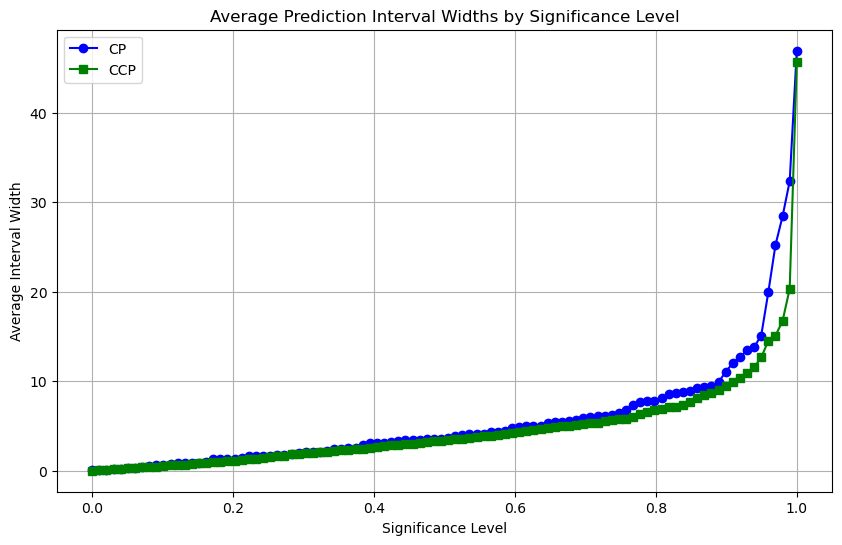

In [21]:
plot_average_intervals(rrmodel, data, new_train_data, calibration_data, test_data)

In [11]:
import data_utils
train_data, test_data = data_utils.load_boston(17)

data = np.concatenate((train_data, test_data), axis=0)

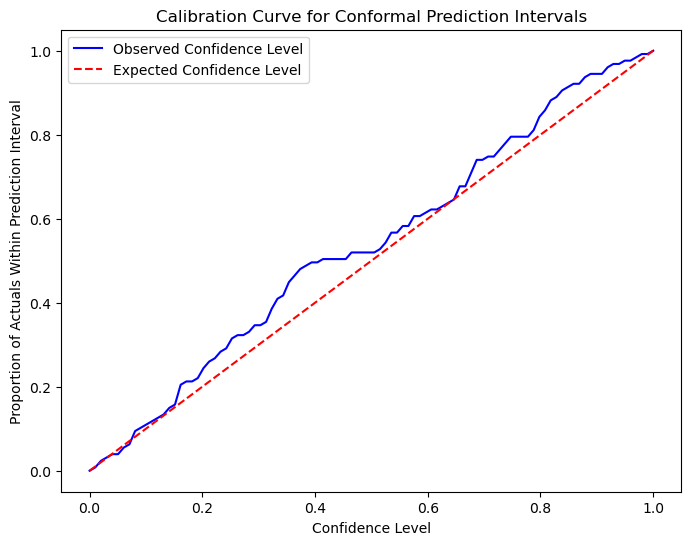

In [16]:
rrmodel = RidgeRegression(10)
confidence_levels = np.linspace(0, 1, 100)
rrmodel.cross_conformal_calibration_curve(data, test_data, confidence_levels)